In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

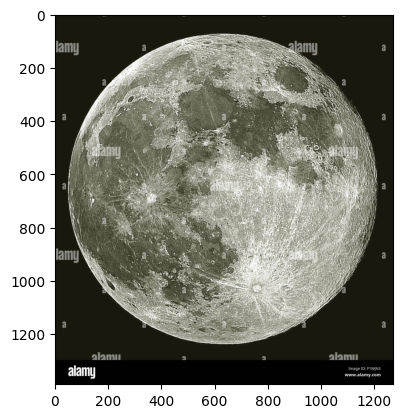

In [ ]:
# 1.1 a
A = Image.open('moon.jpeg')
B = Image.open('earth.jpeg')
plt.imshow(A); # Show image

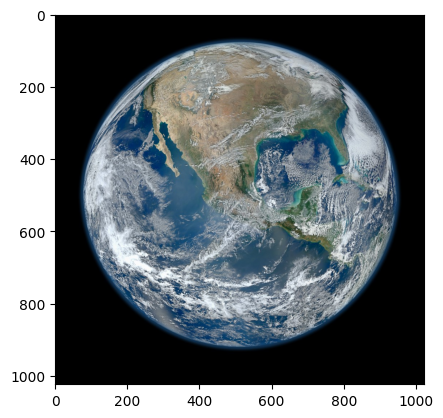

In [ ]:
# 1.1 a
plt.imshow(B); # Show image

New shape:  (256, 256, 3)


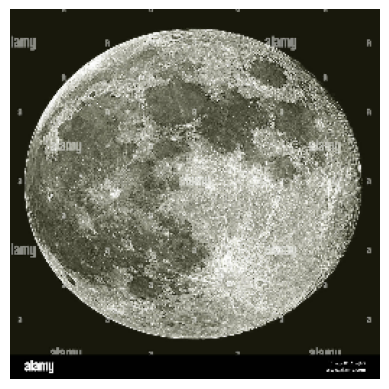

In [ ]:
# 1.1 b
A = np.array(A) # Convert to a numpy array
A = cv2.resize(A, (256, 256))
print("New shape: ", A.shape)
plt.imshow(A); plt.axis(False);

New shape:  (256, 256, 3)


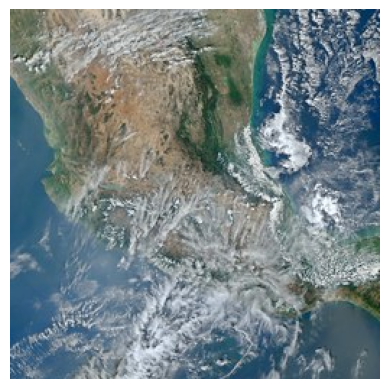

In [ ]:
# 1.1 b
B = np.array(B) # Convert to a numpy array
B = B[384:640, 384:640, :]
print("New shape: ", B.shape)
plt.imshow(B); plt.axis(False);

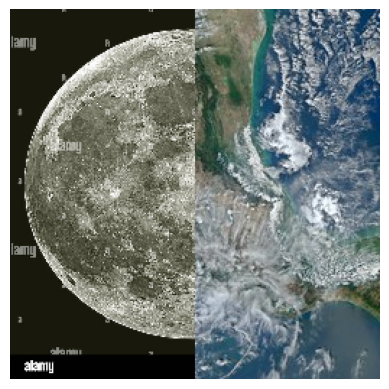

In [ ]:
# 1.1 c

# Get the width
moon_width = A.shape[1]

# Crop the left half
left_half = A[:, :moon_width // 2]

# Get the width
earth_width = B.shape[1]

# Crop the right half
right_half = B[:, earth_width // 2:]

C = np.concatenate((left_half, right_half), axis=1) # Concatenate images horizontally
plt.imshow(C); plt.axis(False);


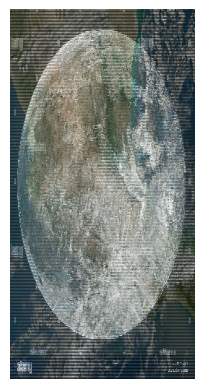

In [ ]:
# 1.1 d
# Get the height
height_d = A.shape[0] + B.shape[0]

D = np.zeros((height_d, A.shape[1], A.shape[2]), dtype=np.uint8)

# Use a loop to fill in the rows of image D
for i in range(height_d):
    if i % 2 != 0:
        # Odd row
        D[i, :] = A[i // 2, :]
    else:
        # Even row
        D[i, :] = B[i // 2, :]
plt.imshow(D); plt.axis(False);

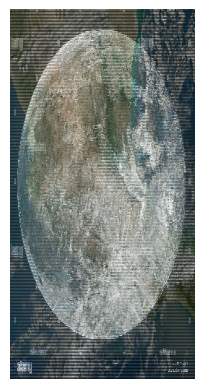

In [ ]:
# 1.1 e

# Initialize an array of indices for the row positions in D
index = np.arange(A.shape[0] + B.shape[0])

# Create a mask for even rows
even_rows = index % 2 == 0

# Generate image D by combining rows from A and B based on the mask
D = np.where(even_rows[:, np.newaxis, np.newaxis], B[index // 2], A[index // 2])

plt.imshow(D); plt.axis(False);

# Basically, we initialize an array of indices representing the row positions in the final image D. Then we set
# a boolean mask based on whether each index is even or not. Finally use np.where function to select rows from B
# when the mask is True and rows from A when the mask is False.

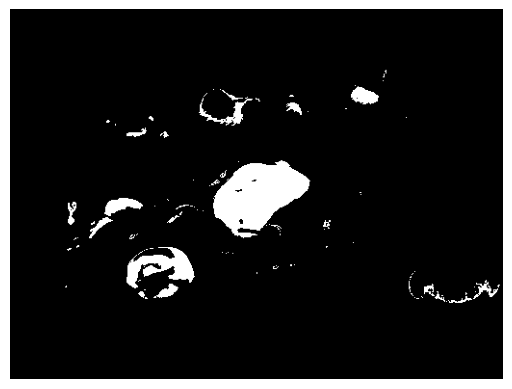

In [ ]:
# 1.2 a
peppers = Image.open('peppers.png')
peppers = np.array(peppers) # Convert to a numpy array

# Set threshold
min_threshold = np.array([160, 160, 0], dtype=np.uint8)
max_threshold = np.array([255, 255, 150], dtype=np.uint8)

# Create a binary mask
yellow_mask = cv2.inRange(peppers, min_threshold, max_threshold)

yellow_peppers_image = cv2.bitwise_and(peppers, peppers, mask=yellow_mask)

# Convert to binary image
yellow_peppers_gray = cv2.cvtColor(yellow_peppers_image, cv2.COLOR_RGB2GRAY)

# Binary conversion
binary_yellow_peppers_image = (yellow_peppers_gray > 0).astype(int)

plt.imshow(binary_yellow_peppers_image, cmap = 'gray'); plt.axis(False);

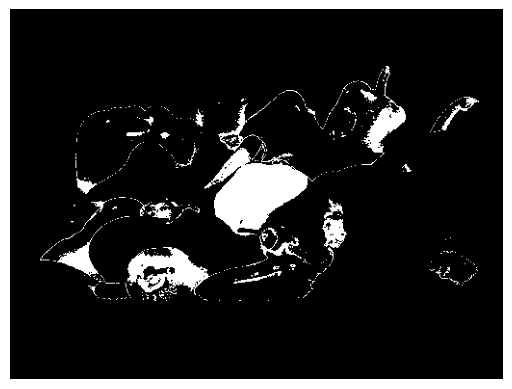

In [ ]:
# 1.2 b

# Convert to HSV color space
pepper_hsv = cv2.cvtColor(peppers, cv2.COLOR_BGR2HSV)

hue_channel = pepper_hsv[:, :, 0]

hue_min = 94
hue_max = 100

# Create the binary mask
hue_mask = cv2.inRange(hue_channel, hue_min, hue_max)

yellow_peppers_image = cv2.bitwise_and(peppers, peppers, mask=hue_mask)

# Convert to binary image
yellow_peppers_gray = cv2.cvtColor(yellow_peppers_image, cv2.COLOR_RGB2GRAY)

# Binary conversion
binary_yellow_peppers_image = (yellow_peppers_gray > 0).astype(int)

plt.imshow(binary_yellow_peppers_image, cmap = 'gray'); plt.axis(False);

1.2 c
Working in the HSV color space is easier since it separates the color information from the brightness information, enabling us to determine the threshold for each color more easily and making it more reliable to changes in lighting conditions.

# 2.2 Write functions to produce transformation matrices. [ 3 points]
Write separate functions that output the 3 x 3 transformation matrices for the following transforms: translation, rotation, similarity (translation, rotation, and scale), and affine. The functions should take as input the following arguments:

In [ ]:
def translation(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

In [ ]:
def rotation(angle):
  theta = np.radians(angle)
  return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])

In [ ]:
def similarity(angle, tx, ty, scale):
  theta = np.radians(angle)
  return np.array([[scale * np.cos(theta), -scale * np.sin(theta), tx],
                     [scale * np.sin(theta), scale * np.cos(theta), ty],
                     [0, 0, 1]])

In [ ]:
def affine(a, b, c, d, e, f):
  return np.array([[a, b, c],
                     [d, e, f],
                     [0, 0, 1]])

# 2.3 Write a function that warps an image with a given transformation matrix [ 5 points]
Next, implement a function imwarp(I, T) that warps image I with transformation matrix T. The function should produce an output image of the same size as I which is the warped image. See Fig. 1 for an example of a warp induced by a rotation transformation matrix. Make the origin of the coordinate system correspond to the CENTER of the image, not the top-left corner. This will result in more intuitive results, such as how the image is rotated around its center in Fig. 1.

In [ ]:
def imwarp(I, T):
  m, n = I.shape[:2]

  # Inverse the matrix
  T_inv = np.linalg.inv(T)

  res = np.zeros_like(I)

  # Calculate the center of the image
  center = (n // 2, m // 2)

  for i in range(m):
    for j in range(n):
      x_new, y_new, _ = np.dot(T_inv, [j - center[0], i - center[1], 1])

      x0, y0 = np.floor(x_new), np.floor(y_new)
      w1 = (x0 + 1 - x_new) * (y0 + 1 - y_new)
      w2 = (x0 + 1 - x_new) * (y_new - y0)
      w3 = (x_new - x0) * (y0 + 1 - y_new)
      w4 = (x_new - x0) * (y_new - y0)

      x_new, y_new = int(x_new + center[0]), int(y_new + center[1])

      if 0 <= x_new < n - 1 and 0 <= y_new < m - 1:
          # Bilinear interpolation
          res[i, j] = (
              w1 * I[int(y0) + center[1], int(x0) + center[0]] +
              w2 * I[int(y0) + 1 + center[1], int(x0) + center[0]] +
              w3 * I[int(y0) + center[1], int(x0) + 1 + center[0]] +
              w4 * I[int(y0) + 1 + center[1], int(x0) + 1 + center[0]]
          )
  return res

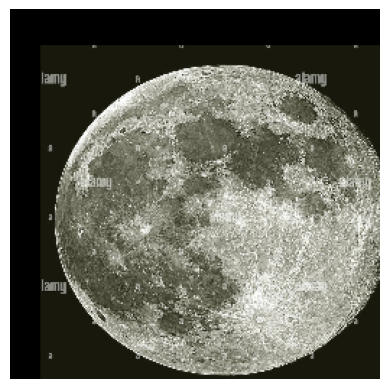

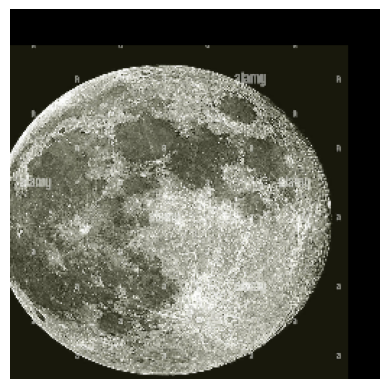

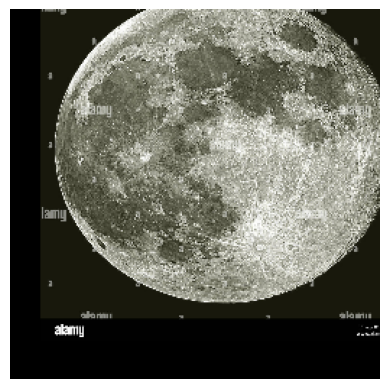

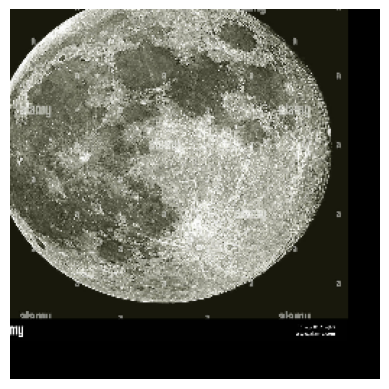

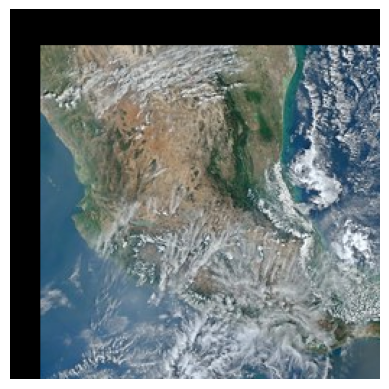

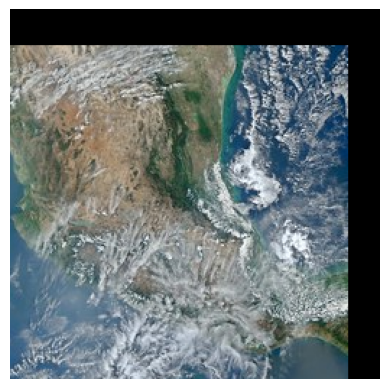

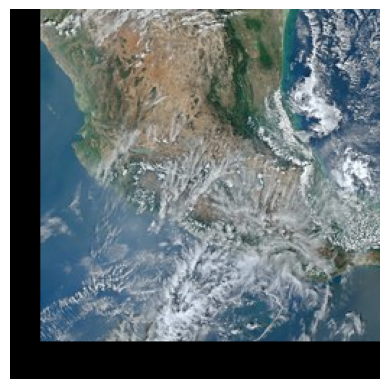

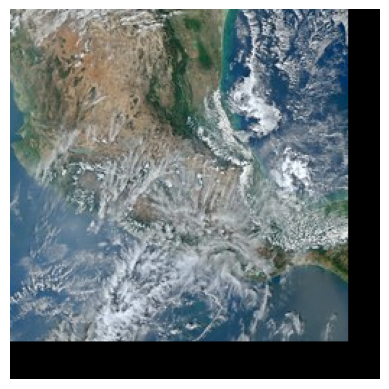

In [ ]:
# translation
translations = [[21, 25],[-21,25],[21,-25],[-21,-25]]
images = [A, B]

for image in images:
  for elt in translations:
    T = translation(elt[0],elt[1])
    warped_image = imwarp(image, T)
    plt.imshow(warped_image)
    plt.axis('off')
    plt.show()

    # print("printing image jkjkjk")
    # plt.imshow(image)
    # plt.axis('off')
    # plt.show()
    # print("printing image lslsls")

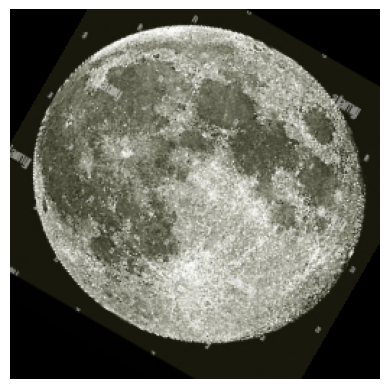

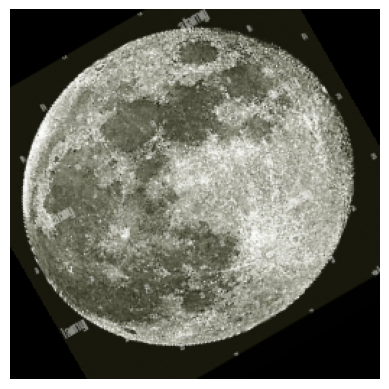

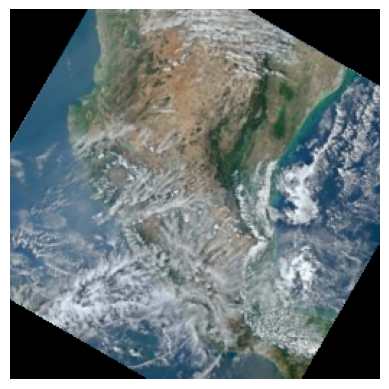

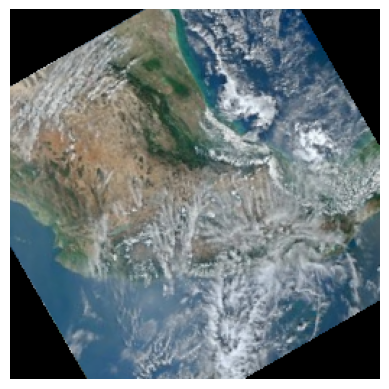

In [ ]:
# b. rotation
degrees = [30, -30]
images = [A, B]
for image in images:
  for degree in degrees:
    T = rotation(degree)
    warped_image = imwarp(image, T)
    plt.imshow(warped_image)
    plt.axis('off')
    plt.show()

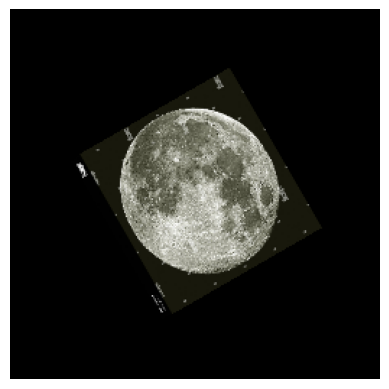

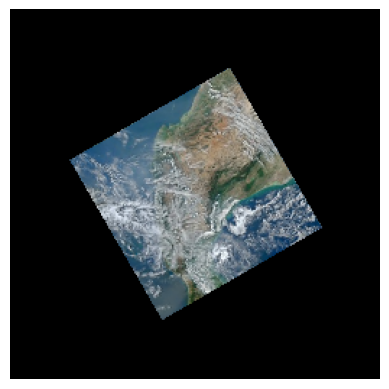

In [ ]:
images = [A, B]
for image in images:
    T = similarity(60, 0, 0, 0.5)
    warped_image = imwarp(image, T)
    plt.imshow(warped_image)
    plt.axis('off')
    plt.show()

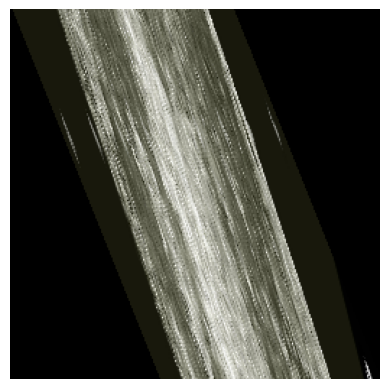

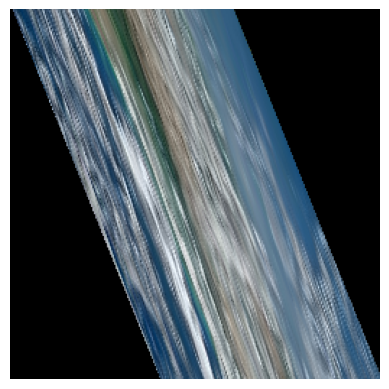

In [ ]:
images = [A, B]
for image in images:
    T = affine(1,2,3,4,5,6)
    warped_image = imwarp(image, T)
    plt.imshow(warped_image)
    plt.axis('off')
    plt.show()